In [19]:
# Machine Learning Models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import pandas as pd

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix
 
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
from sklearn.metrics import make_scorer
 
from sklearn.metrics import classification_report, accuracy_score
import random
random.seed(100)
 
import time
import pyodbc
print(pyodbc.drivers())
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve, precision_recall_curve
)

['SQL Server', 'ODBC Driver 17 for SQL Server', 'SQL Server Native Client RDA 11.0', 'Microsoft Access Driver (*.mdb, *.accdb)', 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)', 'Microsoft Access Text Driver (*.txt, *.csv)', 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)']


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os

In [57]:

# Load your data
tt_data = pd.read_csv('../data/interim/train_test_data.csv')
val_data = pd.read_csv('../data/interim/validation_data.csv')


In [58]:
val_data.rename(columns={'woe_age':'age_woe'},inplace=True)

In [60]:
del tt_data['Unnamed: 0']
del val_data['Unnamed: 0']

In [61]:
del tt_data['payer_code']
del val_data['payer_code']

In [62]:
del tt_data['age']
del val_data['age']

In [63]:
len(tt_data.columns)

37

In [64]:
val_data.dtypes

encounter_id                  int64
race                         object
gender                       object
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_emergency              int64
number_diagnoses              int64
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                    object
glyburide                    object
tolbutamide                  object
pioglitazone                 object
rosiglitazone                object
acarbose                     object
miglitol                     object
troglitazone                 object
tolazamide                   object
insulin                      object
glyburide_metformin          object
glipizide_metformin          object
glimepiride_pioglitazone    

In [65]:
tt_data.columns

Index(['encounter_id', 'race', 'gender', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_emergency', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_type_desc', 'discharge_category', 'admission_category',
       'number_outpatient_boxcox', 'number_inpatient_boxcox', 'age_woe'],
      dtype='object')

In [68]:
val_data.head()

,encounter_id,race,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,change,diabetesMed,readmitted,admission_type_desc,discharge_category,admission_category,number_outpatient_boxcox,number_inpatient_boxcox,age_woe
0,268763496,AfricanAmerican,Female,3,14,0,12,0,9,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,Ch,Yes,1,Emergency,Discharged to Home,Emergency Admission,0.234683,0.366708,-0.096065
1,268777020,Caucasian,Male,4,37,1,20,0,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,Emergency,Discharged to Home,Emergency Admission,0.000000,0.000000,-0.096065
2,268780680,Caucasian,Female,4,63,0,29,1,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,Ch,Yes,0,Emergency,Transfers to Other Healthcare Facilities,Emergency Admission,0.000000,0.366708,0.086466
3,268784670,AfricanAmerican,Female,2,72,1,18,0,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,Emergency,Discharged to Home,Emergency Admission,0.000000,0.000000,-0.096065
4,268787766,Caucasian,Female,1,28,0,13,0,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Yes,0,Emergency,Discharged to Home,Emergency Admission,0.000000,0.000000,0.012694


In [69]:
# Check for unique values in categorical columns
categorical_columns_tt = tt_data.select_dtypes(include=['object']).columns
categorical_columns_tt

Index(['race', 'gender', 'number_emergency', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'change', 'admission_type_desc',
       'discharge_category', 'admission_category'],
      dtype='object')

In [70]:
# Check for unique values in categorical columns
categorical_columns_val = val_data.select_dtypes(include=['object']).columns
categorical_columns_val


Index(['race', 'gender', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'change', 'diabetesMed',
       'admission_type_desc', 'discharge_category', 'admission_category'],
      dtype='object')

In [71]:
imp_cols_logit = [  "number_inpatient_boxcox",     "number_outpatient_boxcox",     "discharge_category_Discharged to Home",     "discharge_category_Transfers to Other Healthcare Facilities",  
   "age_woe",     "discharge_category_Other",  
   "admission_type_desc_Other",     "diabetesMed",     "number_diagnoses",     "repaglinide_Steady",     "metformin_No",     "admission_type_desc_Urgent",     "acarbose_Steady", 
    "glyburide_metformin_Steady", "rosiglitazone_Steady", "race_Caucasian", "change_No", "miglitol_Steady", "chlorpropamide_Up", "chlorpropamide_Steady" ]

In [72]:
# One-Hot Encoding for categorical variables

X = pd.get_dummies(tt_data.drop(columns=['readmitted']), columns=categorical_columns, drop_first=True)
y = tt_data['readmitted']

In [73]:
X = X[imp_cols_logit]

In [74]:
# One-Hot Encoding for categorical variables

X_val = pd.get_dummies(val_data.drop(columns=['readmitted']), columns=categorical_columns_val, drop_first=True)
y_val = val_data['readmitted']

In [75]:
def ensure_all_columns_present(df, important_cols):
    # Iterate over the important columns
    for col in important_cols:
        # If the column is not in the dataframe, add it with a default value of 0
        if col not in df.columns:
            df[col] = 0
    return df

In [76]:
X_val = ensure_all_columns_present(X_val, imp_cols_logit)


In [77]:
X_val = X_val[imp_cols_logit]

In [78]:
X_train.head()

,number_inpatient_boxcox,number_outpatient_boxcox,discharge_category_Discharged to Home,discharge_category_Transfers to Other Healthcare Facilities,age_woe,discharge_category_Other,admission_type_desc_Other,diabetesMed,number_diagnoses,repaglinide_Steady,metformin_No,admission_type_desc_Urgent,acarbose_Steady,glyburide_metformin_Steady,rosiglitazone_Steady,race_Caucasian,change_No,miglitol_Steady,chlorpropamide_Up,chlorpropamide_Steady
48583,0.357118,0.165055,True,False,0.086466,False,False,False,9,False,True,False,False,False,False,True,True,False,False,False
17318,0.000000,0.000000,True,False,-0.096065,False,False,False,9,False,True,False,False,False,False,True,True,False,False,False
7087,0.000000,0.000000,False,True,0.086466,False,False,True,8,False,True,False,False,False,False,True,False,False,False,False
47761,0.000000,0.000000,True,False,0.012694,False,True,True,7,False,False,False,False,False,False,True,False,False,False,False
67136,0.000000,0.000000,True,False,-0.132715,False,False,True,1,False,True,False,False,False,False,False,False,False,False,False


In [79]:
X_val.head()

,number_inpatient_boxcox,number_outpatient_boxcox,discharge_category_Discharged to Home,discharge_category_Transfers to Other Healthcare Facilities,age_woe,discharge_category_Other,admission_type_desc_Other,diabetesMed,number_diagnoses,repaglinide_Steady,metformin_No,admission_type_desc_Urgent,acarbose_Steady,glyburide_metformin_Steady,rosiglitazone_Steady,race_Caucasian,change_No,miglitol_Steady,chlorpropamide_Up,chlorpropamide_Steady
0,0.366708,0.234683,True,False,-0.096065,False,False,0,9,False,False,False,False,False,False,False,False,False,0,False
1,0.000000,0.000000,True,False,-0.096065,False,False,0,9,False,True,False,False,False,False,True,True,False,0,False
2,0.366708,0.000000,False,True,0.086466,False,False,0,9,False,True,False,False,False,False,True,False,False,0,False
3,0.000000,0.000000,True,False,-0.096065,False,False,0,9,False,True,False,False,False,False,False,True,False,0,False
4,0.000000,0.000000,True,False,0.012694,False,False,0,9,False,True,False,False,False,False,True,True,False,0,False


In [80]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [81]:
lr_model = LogisticRegression(C= 0.01, penalty='l2', solver='liblinear')

In [82]:
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predictions for train, validation, and test sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    # Predicted probabilities for ROC/PR curve
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_val_proba = model.predict_proba(X_val)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics for train, validation, and test sets
    metrics_train = {
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred),
        'ROC AUC': roc_auc_score(y_train, y_train_proba)
    }

    metrics_val = {
        'Accuracy': accuracy_score(y_val, y_val_pred),
        'Precision': precision_score(y_val, y_val_pred),
        'Recall': recall_score(y_val, y_val_pred),
        'F1 Score': f1_score(y_val, y_val_pred),
        'ROC AUC': roc_auc_score(y_val, y_val_proba)
    }

    metrics_test = {
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred),
        'ROC AUC': roc_auc_score(y_test, y_test_proba)
    }

    # Combine the metrics into a DataFrame
    metrics_df = pd.DataFrame([metrics_train, metrics_val, metrics_test], index=['Train', 'Validation', 'Test'])

    # Plot ROC curve for test results
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
    fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
    plt.figure(figsize=(14, 6))

    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr_test, tpr_test, label=f'Test ROC AUC = {metrics_test["ROC AUC"]:.2f}')
    plt.plot(fpr_val, tpr_val, label=f'Validation ROC AUC = {metrics_val["ROC AUC"]:.2f}', linestyle='--')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

    # PR Curve for test results
    precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_proba)
    precision_val, recall_val, _ = precision_recall_curve(y_val, y_val_proba)
    plt.subplot(1, 2, 2)
    plt.plot(recall_test, precision_test, label='Test PR Curve')
    plt.plot(recall_val, precision_val, label='Validation PR Curve', linestyle='--')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')

    plt.tight_layout()
    plt.show()

    # Confusion Matrix for test results
    cm_test = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix - Test Data')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return metrics_df

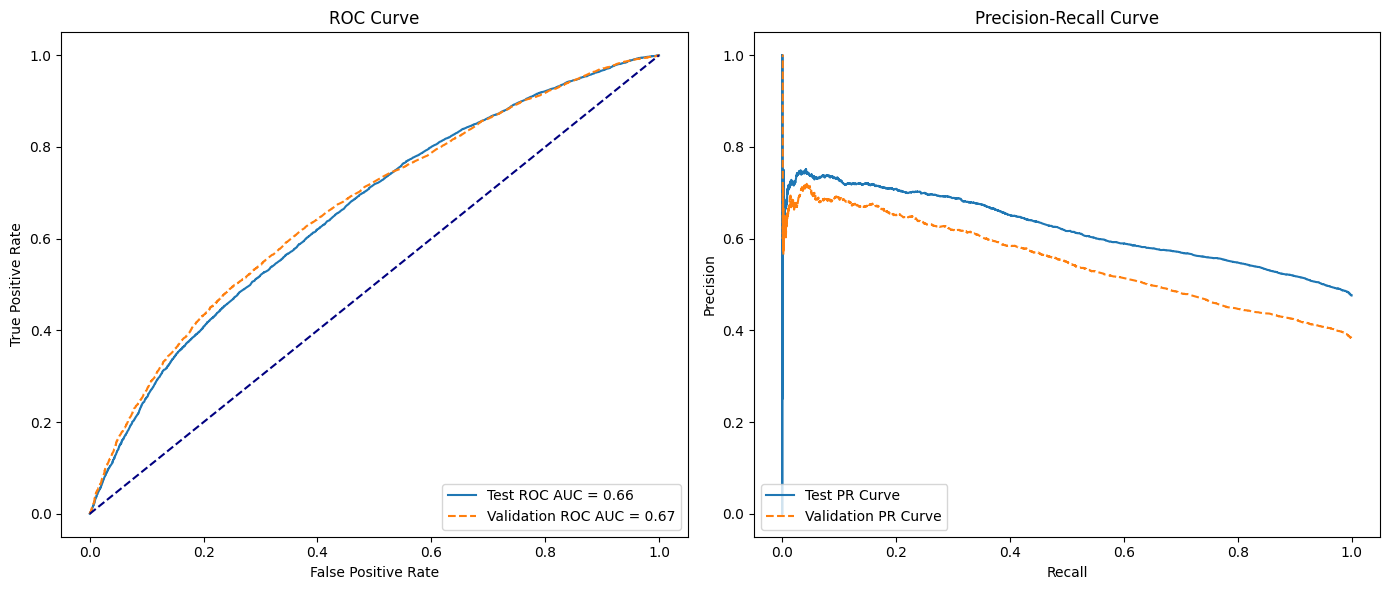

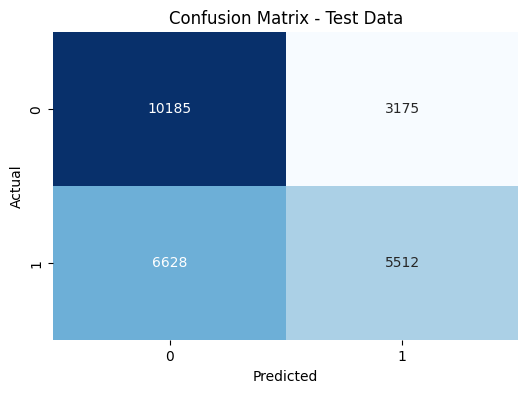

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Train,0.617227,0.634171,0.463198,0.535365,0.663678
Validation,0.650662,0.549385,0.499611,0.523317,0.668683
Test,0.615569,0.634511,0.454036,0.529313,0.659898


In [83]:
evaluate_model(lr_model, X_train, y_train, X_val, y_val, X_test, y_test)

In [84]:
dt_model = DecisionTreeClassifier(max_depth= 10,min_samples_leaf=1,min_samples_split= 5, random_state=42)

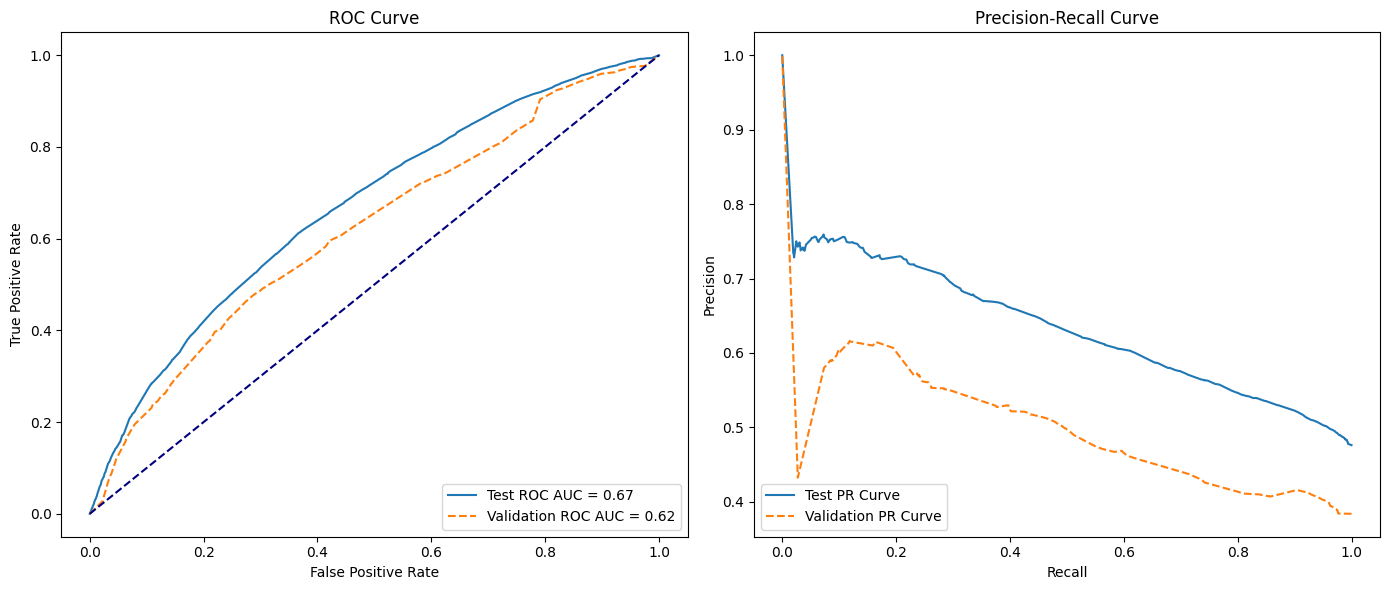

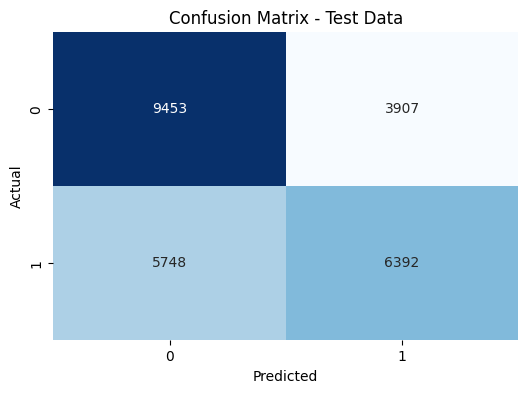

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Train,0.641714,0.643692,0.554206,0.595607,0.701864
Validation,0.620721,0.506209,0.481430,0.493509,0.618768
Test,0.621373,0.620643,0.526524,0.569722,0.667308


In [85]:
evaluate_model(dt_model, X_train, y_train, X_val, y_val, X_test, y_test)

In [88]:
rf_model = RandomForestClassifier(max_depth= 10, min_samples_split= 10,n_estimators=50, random_state=42)

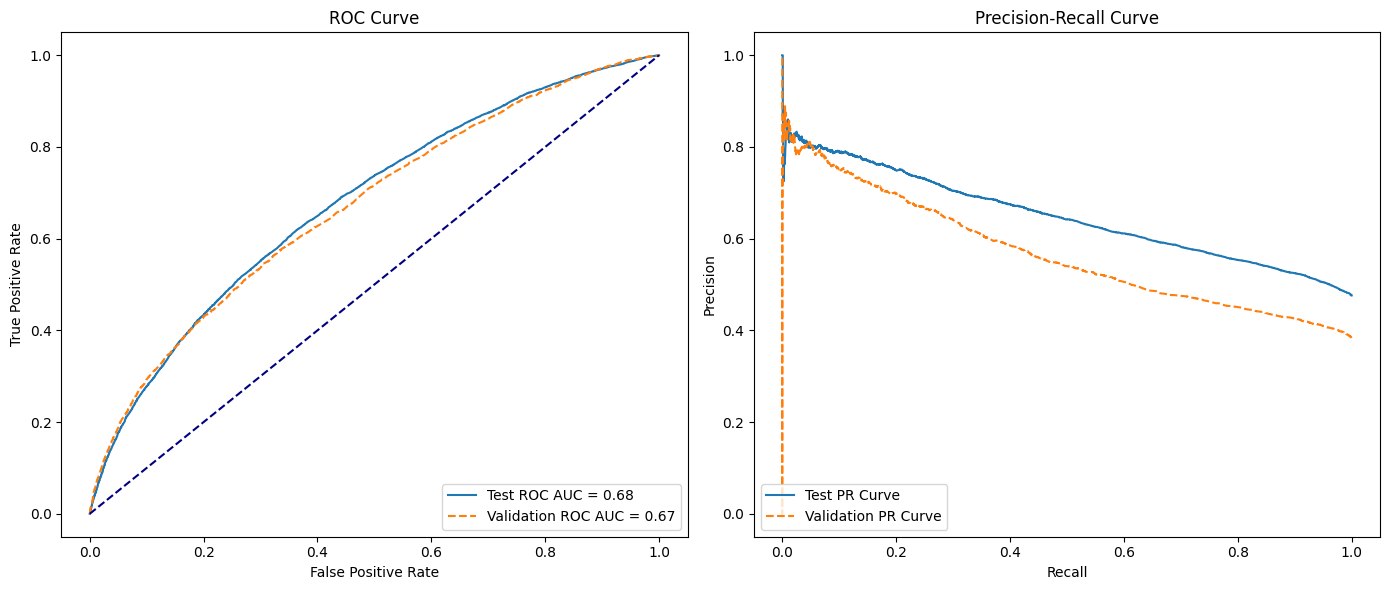

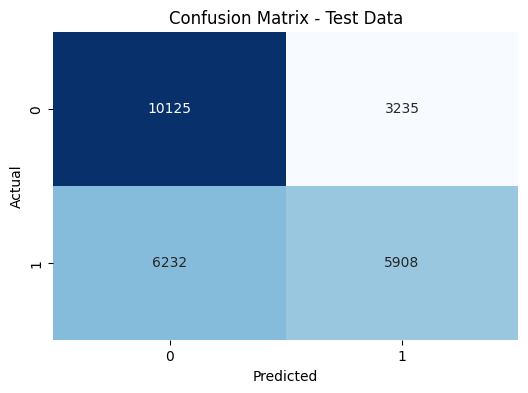

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Train,0.642723,0.662304,0.509161,0.575722,0.700874
Validation,0.638196,0.528485,0.531935,0.530204,0.669488
Test,0.628745,0.646177,0.486656,0.555185,0.677610


In [87]:
evaluate_model(rf_model, X_train, y_train, X_val, y_val, X_test, y_test)

In [89]:
xgboost_model = XGBClassifier(learning_rate=0.2, max_depth= 7,n_estimators= 200, random_state=42)

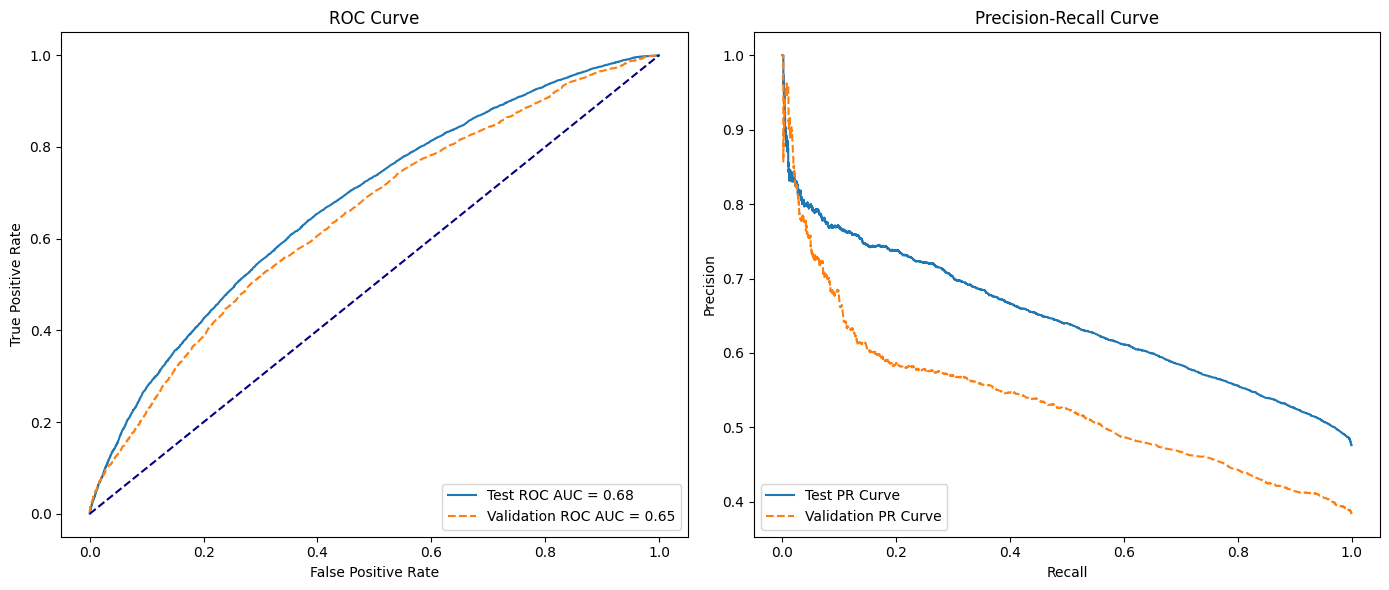

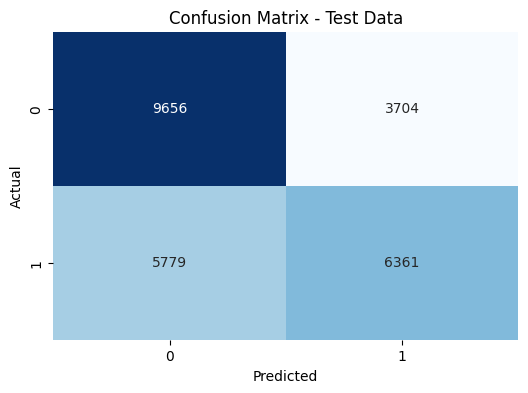

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Train,0.656992,0.665968,0.560808,0.608881,0.723217
Validation,0.629846,0.517607,0.523077,0.520328,0.647459
Test,0.628118,0.631992,0.523970,0.572934,0.677328


In [90]:
evaluate_model(xgboost_model, X_train, y_train, X_val, y_val, X_test, y_test)

In [ ]:
# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier()
}

In [ ]:
# Hyperparameter grids for each model
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    "Decision Tree Classifier": {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest Classifier": {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "XGBoost": {
        'n_estimators': [100, 200, 500],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0]
    }
}

In [ ]:
# Custom function to evaluate models with hyperparameter tuning
def evaluate_models(models, param_grids, X_train, X_test, y_train, y_test):
    # Drop non-predictive columns
    X_train_processed = X_train.drop(['ClaimID', 'Provider'], axis=1)
    X_test_processed = X_test.drop(['ClaimID', 'Provider'], axis=1)
   
    # Define scoring metric to optimize (maximize recall)
    scoring = make_scorer(recall_score)
 
    # Iterate through each model and perform hyperparameter tuning
    for model_name, model in models.items():
        with mlflow.start_run():
            print(f"\nTuning hyperparameters for: {model_name}")
 
            # Perform GridSearchCV for hyperparameter tuning
            grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring=scoring, n_jobs=-1)
            grid_search.fit(X_train_processed, y_train)
 
            # Get the best model after hyperparameter tuning
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_
 
            # Log best hyperparameters
            mlflow.log_params(best_params)
 
            # Make predictions with the best model
            y_train_pred = best_model.predict(X_train_processed)
            y_test_pred = best_model.predict(X_test_processed)
 
            # Calculate metrics
            metrics = {
                'accuracy': {
                    'train': accuracy_score(y_train, y_train_pred),
                    'test': accuracy_score(y_test, y_test_pred)
                },
                'precision': {
                    'train': precision_score(y_train, y_train_pred),
                    'test': precision_score(y_test, y_test_pred)
                },
                'recall': {
                    'train': recall_score(y_train, y_train_pred),
                    'test': recall_score(y_test, y_test_pred)
                },
                'roc_auc': {
                    'train': roc_auc_score(y_train, best_model.predict_proba(X_train_processed)[:, 1]),
                    'test': roc_auc_score(y_test, best_model.predict_proba(X_test_processed)[:, 1])
                }
            }
 
            # Log metrics with model name included
            for metric_name, metric_values in metrics.items():
                mlflow.log_metric(f"{model_name}_train_{metric_name}", metric_values['train'])
                mlflow.log_metric(f"{model_name}_test_{metric_name}", metric_values['test'])
 
            # Log feature importance if applicable
            if hasattr(best_model, 'feature_importances_'):
                feature_importances = best_model.feature_importances_
            elif hasattr(best_model, 'coef_'):
                feature_importances = best_model.coef_[0]
            else:
                feature_importances = None
 
            if feature_importances is not None:
                # Create a DataFrame for better logging
                importance_df = pd.DataFrame({
                    'Feature': X_train_processed.columns,
                    'Importance': feature_importances
                }).sort_values(by='Importance', ascending=False)
 
                # Log the feature importances as an artifact
                importance_file_path = f"mlruns/{model_name}_feature_importances.csv"
                importance_df.to_csv(importance_file_path, index=False)
                mlflow.log_artifact(importance_file_path)
 
            # Log the best model
            mlflow.sklearn.log_model(best_model, model_name)
 
            # End the run
            mlflow.end_run()

In [ ]:
# Call the function with the models, param grids, and training/testing datasets
evaluate_models(models, param_grids, X_train, X_test, y_train, y_test)

In [27]:
import mlflow
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    classification_report,
    make_scorer,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV

def evaluate_single_model(model, param_grid, X_train, X_test, y_train, y_test):
    # Drop non-predictive columns
    X_train_processed = X_train.drop(['encounter_id'], axis=1)
    X_test_processed = X_test.drop(['encounter_id'], axis=1)
    
    # Define scoring metric to optimize (maximize recall)
    scoring = make_scorer(recall_score)

    with mlflow.start_run():
        print(f"\nTuning hyperparameters for: {model.__class__.__name__}")
        
        # Perform GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, n_jobs=-1)
        grid_search.fit(X_train_processed, y_train)
        
        # Get the best model after hyperparameter tuning
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        
        # Log best hyperparameters
        mlflow.log_params(best_params)
        
        # Make predictions with the best model
        y_train_pred = best_model.predict(X_train_processed)
        y_test_pred = best_model.predict(X_test_processed)
        
        # Calculate metrics
        metrics = {
            'accuracy': {
                'train': accuracy_score(y_train, y_train_pred),
                'test': accuracy_score(y_test, y_test_pred)
            },
            'precision': {
                'train': precision_score(y_train, y_train_pred),
                'test': precision_score(y_test, y_test_pred)
            },
            'recall': {
                'train': recall_score(y_train, y_train_pred),
                'test': recall_score(y_test, y_test_pred)
            },
            'roc_auc': {
                'train': roc_auc_score(y_train, best_model.predict_proba(X_train_processed)[:, 1]),
                'test': roc_auc_score(y_test, best_model.predict_proba(X_test_processed)[:, 1])
            }
        }

        # Log metrics with model name included
        for metric_name, metric_values in metrics.items():
            mlflow.log_metric(f"{model.__class__.__name__}_train_{metric_name}", metric_values['train'])
            mlflow.log_metric(f"{model.__class__.__name__}_test_{metric_name}", metric_values['test'])

        # Log feature importance if applicable
        if hasattr(best_model, 'feature_importances_'):
            feature_importances = best_model.feature_importances_
        elif hasattr(best_model, 'coef_'):
            feature_importances = best_model.coef_[0]
        else:
            feature_importances = None

        if feature_importances is not None:
            # Create a DataFrame for better logging
            importance_df = pd.DataFrame({
                'Feature': X_train_processed.columns,
                'Importance': feature_importances
            }).sort_values(by='Importance', ascending=False)

            # Log the feature importances as an artifact
            importance_file_path = f"{model.__class__.__name__}_feature_importances.csv"
            importance_df.to_csv(importance_file_path, index=False)
            mlflow.log_artifact(importance_file_path)

        # Log the best model
        mlflow.sklearn.log_model(best_model, model.__class__.__name__)

        # End the run
        mlflow.end_run()

        # Evaluation Report
        print(classification_report(y_test, y_test_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'{model.__class__.__name__} - Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # ROC-AUC Curve
        y_proba = best_model.predict_proba(X_test_processed)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'{model.__class__.__name__} - ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()

        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        plt.figure(figsize=(6, 5))
        plt.plot(recall, precision, label='Precision-Recall curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'{model.__class__.__name__} - Precision-Recall Curve')
        plt.legend(loc='lower left')
        plt.show()





Tuning hyperparameters for: LogisticRegression


2024/10/08 22:47:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


              precision    recall  f1-score   support

           0       0.64      0.66      0.65     13360
           1       0.61      0.59      0.60     12140

    accuracy                           0.63     25500
   macro avg       0.63      0.63      0.63     25500
weighted avg       0.63      0.63      0.63     25500



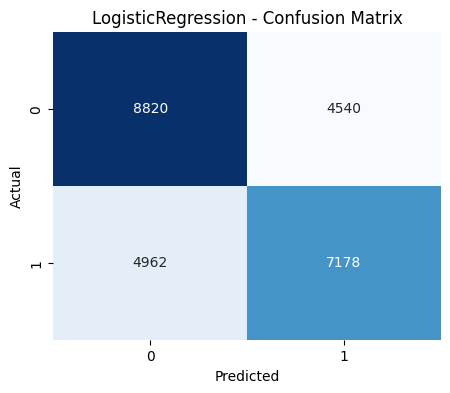

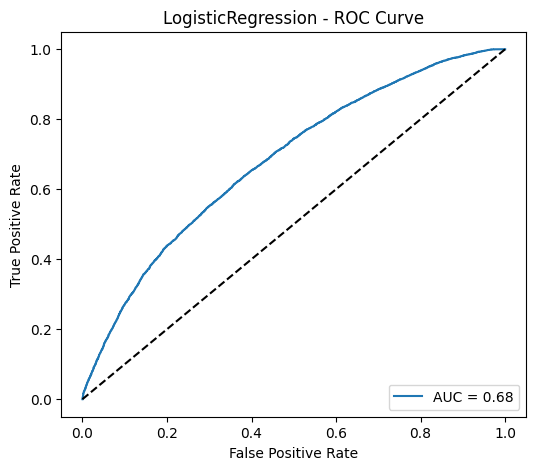

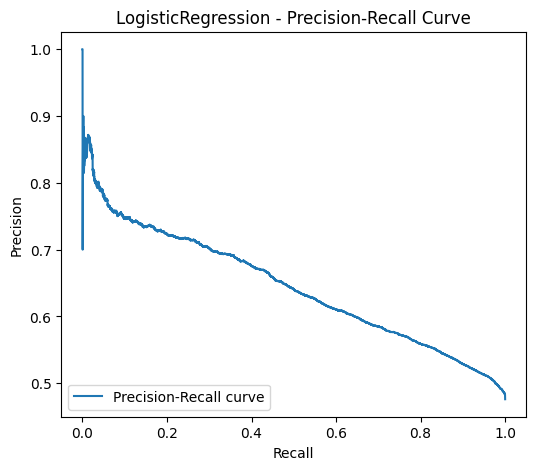

In [28]:
# Example usage with one model and hyperparameters
model = LogisticRegression(class_weight='balanced', random_state=42)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Call the function with the model, param grid, and training/testing datasets
evaluate_single_model(model, param_grid, X_train, X_test, y_train, y_test)


Tuning hyperparameters for: DecisionTreeClassifier


2024/10/08 22:54:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


              precision    recall  f1-score   support

           0       0.64      0.64      0.64     13360
           1       0.60      0.61      0.61     12140

    accuracy                           0.62     25500
   macro avg       0.62      0.62      0.62     25500
weighted avg       0.62      0.62      0.62     25500



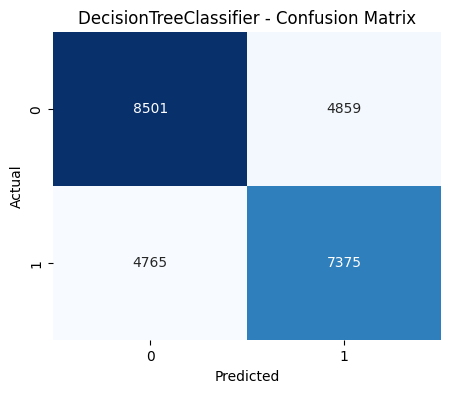

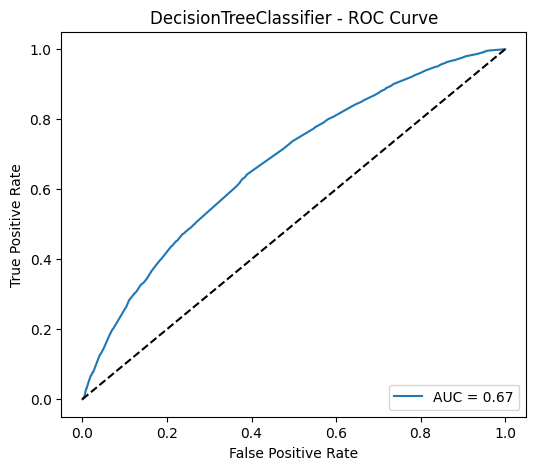

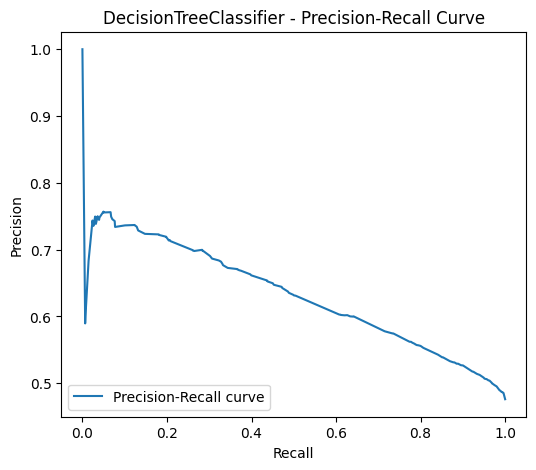

In [29]:
# 2. Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
evaluate_single_model(model_dt, param_grid_dt, X_train, X_test, y_train, y_test)

In [ ]:
# 3. Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
evaluate_single_model(model_rf, param_grid_rf, X_train, X_test, y_train, y_test)



Tuning hyperparameters for: RandomForestClassifier


In [ ]:
# 4. XGBoost Classifier
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
evaluate_single_model(model_xgb, param_grid_xgb, X_train, X_test, y_train, y_test)
